In [1]:
import pandas as pd
import numpy as np

pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
pd.set_option('display.max_colwidth',None) 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [46]:
df_train = pd.read_csv('train_s3TEQDk.csv')
df_train.head()

ID  Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  NNVBBKZB  Female   73       RG268          Other           X3       43   
1  IDD62UNG  Female   30       RG277       Salaried           X1       32   
2  HD3DSEMC  Female   56       RG268  Self_Employed           X3       26   
3  BF3NC7KV    Male   34       RG270       Salaried           X1       19   
4  TEASRWXV  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead  
0             No              1045696        No        0  
1             No               581988        No        0  
2             No              1484315       Yes        0  
3             No               470454        No        0  
4             No               886787        No        0

In [47]:
df_train['Status'] = 'Train'
df_train = df_train.drop(['ID'],axis = 1)
df_train.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  
0             No              1045696        No        0  Train  
1             No               581988        No        0  Train  
2             No              1484315       Yes        0  Train  
3             No               470454        No        0  Train  
4             No               886787        No        0  Train

In [48]:
df_test = pd.read_csv('test_mSzZ8RL.csv')
df_test.head()

ID  Gender  Age Region_Code Occupation Channel_Code  Vintage  \
0  VBENBARO    Male   29       RG254      Other           X1       25   
1  CCMEWNKY    Male   43       RG268      Other           X2       49   
2  VK3KGA9M    Male   31       RG270   Salaried           X1       14   
3  TT8RPZVC    Male   29       RG272      Other           X1       33   
4  SHQZEYTZ  Female   29       RG270      Other           X1       19   

  Credit_Product  Avg_Account_Balance Is_Active  
0            Yes               742366        No  
1            NaN               925537        No  
2             No               215949        No  
3             No               868070        No  
4             No               657087        No

In [49]:
df_test['Status'] = 'Test'
ID = df_test['ID']
df_test = df_test.drop(['ID'],axis = 1)
df_test.head()

Gender  Age Region_Code Occupation Channel_Code  Vintage Credit_Product  \
0    Male   29       RG254      Other           X1       25            Yes   
1    Male   43       RG268      Other           X2       49            NaN   
2    Male   31       RG270   Salaried           X1       14             No   
3    Male   29       RG272      Other           X1       33             No   
4  Female   29       RG270      Other           X1       19             No   

   Avg_Account_Balance Is_Active Status  
0               742366        No   Test  
1               925537        No   Test  
2               215949        No   Test  
3               868070        No   Test  
4               657087        No   Test

In [8]:
print(df_train.shape)
print(df_test.shape)

(245725, 11)
(105312, 10)


In [6]:
# checking if all the 'Region_Code' of test set is present in train set.
# If not then, remove train rows which has Region_Code not present in test set

test_region_list=df_test['Region_Code'].tolist()
df_train=df_train[df_train['Region_Code'].isin(test_region_list)]
df_train.shape

# all the region_code of test set are present in train set

(245725, 11)

In [50]:
df_total= pd.concat([df_train,df_test],ignore_index = True)
df_total.shape

(351037, 11)

In [8]:
df_total.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  
0             No              1045696        No      0.0  Train  
1             No               581988        No      0.0  Train  
2             No              1484315       Yes      0.0  Train  
3             No               470454        No      0.0  Train  
4             No               886787        No      0.0  Train

In [12]:
df_total.isnull().sum()

Gender                      0
Age                         0
Region_Code                 0
Occupation                  0
Channel_Code                0
Vintage                     0
Credit_Product          41847
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                105312
Status                      0
dtype: int64

In [13]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               351037 non-null  object 
 1   Age                  351037 non-null  int64  
 2   Region_Code          351037 non-null  object 
 3   Occupation           351037 non-null  object 
 4   Channel_Code         351037 non-null  object 
 5   Vintage              351037 non-null  int64  
 6   Credit_Product       309190 non-null  object 
 7   Avg_Account_Balance  351037 non-null  int64  
 8   Is_Active            351037 non-null  object 
 9   Is_Lead              245725 non-null  float64
 10  Status               351037 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 29.5+ MB


In [14]:
df_total['Gender'].value_counts()

Male      191902
Female    159135
Name: Gender, dtype: int64

In [15]:
df_total['Age'].nunique()
df_total['Age'].value_counts()

63

28    20880
29    18984
27    18615
30    15684
26    12916
31    11978
49     9071
48     9068
47     8964
32     8808
50     8530
51     8392
46     8259
45     8033
52     7925
25     7615
53     7378
33     7181
44     7129
54     6922
43     6526
55     6378
34     6165
42     6022
56     5988
57     5661
41     5556
35     5365
58     5266
36     5060
40     5031
59     4876
37     4781
39     4767
38     4642
60     4425
61     4035
62     3702
63     3438
64     3263
24     2681
65     2622
66     2496
67     2335
68     2130
69     2024
70     1930
71     1908
72     1819
73     1757
75     1700
74     1681
76     1630
77     1609
79     1513
78     1502
80     1328
81     1189
82     1077
83     1022
84      916
85      888
23        1
Name: Age, dtype: int64

In [16]:
df_total['Region_Code'].nunique()
df_total['Region_Code'].value_counts()

35

RG268    51059
RG283    42297
RG254    38577
RG284    27493
RG277    18422
RG280    18304
RG270    11160
RG269    11151
RG261    10919
RG257     8689
RG251     8628
RG282     8166
RG272     7590
RG274     7494
RG281     7237
RG273     6300
RG252     6097
RG279     5576
RG263     5302
RG275     4628
RG260     4410
RG256     4041
RG264     4034
RG276     3949
RG259     3688
RG250     3544
RG255     2909
RG258     2763
RG253     2668
RG278     2646
RG262     2588
RG265     2214
RG266     2209
RG271     2196
RG267     2089
Name: Region_Code, dtype: int64

In [17]:
df_total['Occupation'].value_counts()

Self_Employed    144078
Salaried         102912
Other            100304
Entrepreneur       3743
Name: Occupation, dtype: int64

In [18]:
df_total['Channel_Code'].value_counts()

X1    148202
X3     97981
X2     96902
X4      7952
Name: Channel_Code, dtype: int64

In [19]:
df_total['Vintage'].nunique()
df_total['Vintage'].value_counts()

66

13     17717
14     17593
21     17550
15     17518
19     17457
20     17127
26     15707
27     15526
25     15433
33     13661
31     13639
32     13600
93      5836
91      5807
92      5674
86      4384
62      4373
61      4349
87      4322
85      4260
63      4198
67      3983
55      3954
69      3942
68      3912
56      3891
57      3843
97      3843
50      3807
49      3781
98      3769
51      3735
99      3727
81      3666
74      3630
73      3563
80      3558
75      3550
79      3488
37      3340
38      3326
39      3275
104     2652
103     2645
105     2634
109     2501
111     2469
110     2463
44      2363
43      2297
45      2288
116     2132
117     2096
115     2017
123     1405
121     1380
122     1346
7        920
9        913
8        911
127      761
129      746
128      712
133       29
135       26
134       17
Name: Vintage, dtype: int64

In [51]:
df_total['Credit_Product'].value_counts(normalize=True)

No     0.666144
Yes    0.333856
Name: Credit_Product, dtype: float64

In [52]:
# imputing the missing values using forward fill. and also maitaing the ration of the two classes
df_total['Credit_Product'] = df_total['Credit_Product'].fillna(method='ffill')

In [53]:
df_total['Credit_Product'].isna().sum()

0

In [54]:
df_total['Credit_Product'].value_counts(normalize=True)

No     0.665944
Yes    0.334056
Name: Credit_Product, dtype: float64

In [24]:
df_total['Avg_Account_Balance'].nunique()
df_total['Avg_Account_Balance'].value_counts()

162137

4022185     172
1611273      47
936814       45
4126262      44
1142030      43
2521592      42
1131554      33
4350302      30
996203       30
2106541      30
1177781      29
2023833      29
2433144      28
2022676      28
423195       27
1552222      26
815889       26
2572073      25
1940467      25
930610       25
1206145      25
1387777      24
1859752      23
1501723      23
1284875      22
925956       22
2019303      22
1454544      21
740248       20
2488751      20
1963010      20
1285044      20
424343       19
1105282      19
1381030      19
1248776      19
2568540      19
2095736      19
868987       19
1530800      19
1527765      18
1160764      18
2166126      18
997387       18
2192835      18
2209273      18
713762       18
1305897      18
4944884      18
2041223      17
2163937      17
894147       17
1060079      17
1335204      17
1843083      16
1308273      16
849914       16
1649926      16
1371249      16
785425       16
2017781      16
1323750      16
1358148 

In [25]:
df_total['Is_Active'].value_counts()

No     214087
Yes    136950
Name: Is_Active, dtype: int64

In [55]:
df_backup = df_total.copy()
df_backup.shape

(351037, 11)

In [56]:
# reverting the df_total
df_total = df_backup.copy()
df_total.shape

(351037, 11)

In [28]:
df_total.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  
0             No              1045696        No      0.0  Train  
1             No               581988        No      0.0  Train  
2             No              1484315       Yes      0.0  Train  
3             No               470454        No      0.0  Train  
4             No               886787        No      0.0  Train

In [14]:
gender_map = {'Male':0, 'Female': 1}
df_total['Gender'] = df_total['Gender'].map(gender_map)
df_total.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0       1   73       RG268          Other           X3       43   
1       1   30       RG277       Salaried           X1       32   
2       1   56       RG268  Self_Employed           X3       26   
3       0   34       RG270       Salaried           X1       19   
4       1   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  
0             No              1045696        No      0.0  Train  
1             No               581988        No      0.0  Train  
2             No              1484315       Yes      0.0  Train  
3             No               470454        No      0.0  Train  
4             No               886787        No      0.0  Train

In [15]:
df_total = pd.get_dummies(df_total,prefix = ['Region_Code'],columns=['Region_Code'],drop_first = True)
df_total.head()

Gender  Age     Occupation Channel_Code  Vintage Credit_Product  \
0       1   73          Other           X3       43             No   
1       1   30       Salaried           X1       32             No   
2       1   56  Self_Employed           X3       26             No   
3       0   34       Salaried           X1       19             No   
4       1   30       Salaried           X1       33             No   

   Avg_Account_Balance Is_Active  Is_Lead Status  Region_Code_RG251  \
0              1045696        No      0.0  Train                  0   
1               581988        No      0.0  Train                  0   
2              1484315       Yes      0.0  Train                  0   
3               470454        No      0.0  Train                  0   
4               886787        No      0.0  Train                  0   

   Region_Code_RG252  Region_Code_RG253  Region_Code_RG254  Region_Code_RG255  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG256  Region_Code_RG257  Region_Code_RG258  Region_Code_RG259  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG260  Region_Code_RG261  Region_Code_RG262  Region_Code_RG263  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG264  Region_Code_RG265  Region_Code_RG266  Region_Code_RG267  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG268  Region_Code_RG269  Region_Code_RG270  Region_Code_RG271  \
0                  1                  0                  0                  0   
1                  0                  0                  0                  0   
2                  1                  0                  0                  0   
3                  0                  0                  1                  0   
4                  0                  0                  0                  0   

   Region_Code_RG272  Region_Code_RG273  Region_Code_RG274  Region_Code_RG275  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG276  Region_Code_RG277  Region_Code_RG278  Region_Code_RG279  \
0                  0                  0                  0                  0   
1                  0                  1                  0             

In [16]:
df_total = pd.get_dummies(df_total,prefix = ['Channel_Code'],columns=['Channel_Code'],drop_first = True)
df_total.head()

Gender  Age     Occupation  Vintage Credit_Product  Avg_Account_Balance  \
0       1   73          Other       43             No              1045696   
1       1   30       Salaried       32             No               581988   
2       1   56  Self_Employed       26             No              1484315   
3       0   34       Salaried       19             No               470454   
4       1   30       Salaried       33             No               886787   

  Is_Active  Is_Lead Status  Region_Code_RG251  Region_Code_RG252  \
0        No      0.0  Train                  0                  0   
1        No      0.0  Train                  0                  0   
2       Yes      0.0  Train                  0                  0   
3        No      0.0  Train                  0                  0   
4        No      0.0  Train                  0                  0   

   Region_Code_RG253  Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG257  Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG261  Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG265  Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  0   
2                  0                  0                  0                  1   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG269  Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  1                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG273  Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG277  Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  \
0                  0                  0                  0                  0   
1                  1               

In [17]:
df_total = pd.get_dummies(df_total,prefix = ['Occupation'],columns=['Occupation'],drop_first = True)
df_total.head()

Gender  Age  Vintage Credit_Product  Avg_Account_Balance Is_Active  \
0       1   73       43             No              1045696        No   
1       1   30       32             No               581988        No   
2       1   56       26             No              1484315       Yes   
3       0   34       19             No               470454        No   
4       1   30       33             No               886787        No   

   Is_Lead Status  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0  Train                  0                  0                  0   
1      0.0  Train                  0                  0                  0   
2      0.0  Train                  0                  0                  0   
3      0.0  Train                  0                  0                  0   
4      0.0  Train                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   
1          

In [18]:
credit_Product_map = {'No':0, 'Yes': 1}
df_total['Credit_Product'] = df_total['Credit_Product'].map(credit_Product_map)
df_total.head()

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance Is_Active  \
0       1   73       43               0              1045696        No   
1       1   30       32               0               581988        No   
2       1   56       26               0              1484315       Yes   
3       0   34       19               0               470454        No   
4       1   30       33               0               886787        No   

   Is_Lead Status  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0  Train                  0                  0                  0   
1      0.0  Train                  0                  0                  0   
2      0.0  Train                  0                  0                  0   
3      0.0  Train                  0                  0                  0   
4      0.0  Train                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   
1    

In [19]:
is_Active_map = {'No':0, 'Yes': 1}
df_total['Is_Active'] = df_total['Is_Active'].map(is_Active_map)
df_total.head()

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  \
0       1   73       43               0              1045696          0   
1       1   30       32               0               581988          0   
2       1   56       26               0              1484315          1   
3       0   34       19               0               470454          0   
4       1   30       33               0               886787          0   

   Is_Lead Status  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0  Train                  0                  0                  0   
1      0.0  Train                  0                  0                  0   
2      0.0  Train                  0                  0                  0   
3      0.0  Train                  0                  0                  0   
4      0.0  Train                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   

In [20]:
df_total.shape

(351037, 48)

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Avg_Account_Balance'>

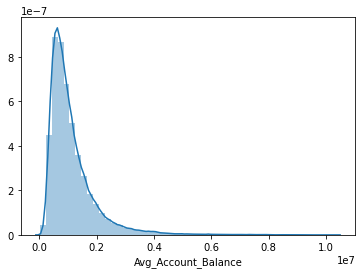

In [37]:
sns.distplot(df_total['Avg_Account_Balance'])

<AxesSubplot:xlabel='Age'>

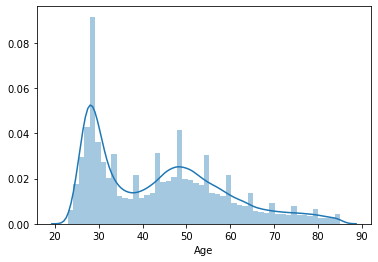

In [38]:
sns.distplot(df_total['Age'])

In [22]:
from sklearn.preprocessing import KBinsDiscretizer
age_descritizer = KBinsDiscretizer(n_bins = 8,encode = 'ordinal',strategy = 'quantile')
age_descritizer

KBinsDiscretizer(encode='ordinal', n_bins=8)

In [23]:
df_total['Age_Bins'] = age_descritizer.fit_transform(df_total['Age'].values.reshape(-1,1)).astype(int)
df_total.head()

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  \
0       1   73       43               0              1045696          0   
1       1   30       32               0               581988          0   
2       1   56       26               0              1484315          1   
3       0   34       19               0               470454          0   
4       1   30       33               0               886787          0   

   Is_Lead Status  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0  Train                  0                  0                  0   
1      0.0  Train                  0                  0                  0   
2      0.0  Train                  0                  0                  0   
3      0.0  Train                  0                  0                  0   
4      0.0  Train                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   

In [24]:
df_total['Age_Bins'].unique()

array([7, 2, 6, 5, 3, 0, 4, 1])

In [25]:
age_descritizer.bin_edges_#bins size
age_descritizer.n_bins_ #number of bins

array([array([23., 28., 30., 35., 43., 48., 54., 62., 85.])], dtype=object)

array([8])

In [43]:
df_total[['Age','Age_Bins']].head()

Age  Age_Bins
0   73         7
1   30         2
2   56         6
3   34         2
4   30         2

In [44]:
min_age = df_total[['Age']].min()
min_age
max_age = df_total[['Age']].max()
max_age

Age    23
dtype: int64

Age    85
dtype: int64

In [26]:
min_balance = df_total[['Avg_Account_Balance']].min()
min_balance
max_balance = df_total[['Avg_Account_Balance']].max()
max_balance

Avg_Account_Balance    20790
dtype: int64

Avg_Account_Balance    10352009
dtype: int64

In [27]:
balance_descritizer = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'uniform')
balance_descritizer
df_total['Avg_Account_Balance_Bins'] = balance_descritizer.fit_transform(df_total['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)
df_total.head()

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  \
0       1   73       43               0              1045696          0   
1       1   30       32               0               581988          0   
2       1   56       26               0              1484315          1   
3       0   34       19               0               470454          0   
4       1   30       33               0               886787          0   

   Is_Lead Status  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0  Train                  0                  0                  0   
1      0.0  Train                  0                  0                  0   
2      0.0  Train                  0                  0                  0   
3      0.0  Train                  0                  0                  0   
4      0.0  Train                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   

In [28]:
df_total['Avg_Account_Balance_Bins'].unique()
balance_descritizer.bin_edges_#bins size
balance_descritizer.n_bins_ #number of bins

array([0, 1, 2, 6, 5, 3, 7, 4, 8, 9])

array([array([   20790. ,  1053911.9,  2087033.8,  3120155.7,  4153277.6,
        5186399.5,  6219521.4,  7252643.3,  8285765.2,  9318887.1,
       10352009. ])], dtype=object)

array([10])

In [48]:
df_total[['Avg_Account_Balance','Avg_Account_Balance_Bins']].head()

Avg_Account_Balance  Avg_Account_Balance_Bins
0              1045696                         0
1               581988                         0
2              1484315                         1
3               470454                         0
4               886787                         0

In [49]:
df_total['Avg_Account_Balance_Bins'].value_counts()

0    212085
1    105494
2     21856
3      6991
4      2310
5      1085
6       612
7       405
8       175
9        24
Name: Avg_Account_Balance_Bins, dtype: int64

In [50]:
df1 = df_total.copy()
df1.shape

(351037, 50)

In [51]:
df_total = df1.copy()
df_total.shape

(351037, 50)

In [91]:
# def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.20)
    q3 = df_in[col_name].quantile(0.80)
    iqr = q3-q1 #Interquartile range
    min_threshold  = q1-1.5*iqr
    max_threshold = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > min_threshold) & (df_in[col_name] < max_threshold)]
    return df_out

In [92]:
df_total = remove_outlier(df_total,'Avg_Account_Balance')
df_total.shape

(338036, 50)

In [29]:
df_train = df_total[df_total['Status'] == 'Train']
df_train = df_train.drop(['Status'],axis = 1)
df_train.shape
df_train.head()

(245725, 49)

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  \
0       1   73       43               0              1045696          0   
1       1   30       32               0               581988          0   
2       1   56       26               0              1484315          1   
3       0   34       19               0               470454          0   
4       1   30       33               0               886787          0   

   Is_Lead  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
0      0.0                  0                  0                  0   
1      0.0                  0                  0                  0   
2      0.0                  0                  0                  0   
3      0.0                  0                  0                  0   
4      0.0                  0                  0                  0   

   Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  Region_Code_RG257  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG258  Region_Code_RG259  Region_Code_RG260  Region_Code_RG261  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG262  Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  Region_Code_RG269  \
0                  0                  0                  1                  0   
1                  0                  0                  0                  0   
2                  0                  0                  1                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG270  Region_Code_RG271  Region_Code_RG272  Region_Code_RG273  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG274  Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Region_Code_RG278  Region_Code_RG279  Region_Code_RG280  Region_Code_RG281  \
0                  0                  0                  0                  0   
1                  0                  0  

In [30]:
df_test = df_total[df_total['Status'] == 'Test']
df_test = df_test.drop(['Status'],axis = 1)
df_test.shape
df_test.head()

(105312, 49)

Gender  Age  Vintage  Credit_Product  Avg_Account_Balance  Is_Active  \
245725       0   29       25               1               742366          0   
245726       0   43       49               1               925537          0   
245727       0   31       14               0               215949          0   
245728       0   29       33               0               868070          0   
245729       1   29       19               0               657087          0   

        Is_Lead  Region_Code_RG251  Region_Code_RG252  Region_Code_RG253  \
245725      NaN                  0                  0                  0   
245726      NaN                  0                  0                  0   
245727      NaN                  0                  0                  0   
245728      NaN                  0                  0                  0   
245729      NaN                  0                  0                  0   

        Region_Code_RG254  Region_Code_RG255  Region_Code_RG256  \
245725                  1                  0                  0   
245726                  0                  0                  0   
245727                  0                  0                  0   
245728                  0                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG257  Region_Code_RG258  Region_Code_RG259  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  0                  0   
245728                  0                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG260  Region_Code_RG261  Region_Code_RG262  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  0                  0   
245728                  0                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG263  Region_Code_RG264  Region_Code_RG265  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  0                  0   
245728                  0                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG266  Region_Code_RG267  Region_Code_RG268  \
245725                  0                  0                  0   
245726                  0                  0                  1   
245727                  0                  0                  0   
245728                  0                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG269  Region_Code_RG270  Region_Code_RG271  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  1                  0   
245728                  0                  0                  0   
245729                  0                  1                  0   

        Region_Code_RG272  Region_Code_RG273  Region_Code_RG274  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  0                  0   
245728                  1                  0                  0   
245729                  0                  0                  0   

        Region_Code_RG275  Region_Code_RG276  Region_Code_RG277  \
245725                  0                  0                  0   
245726                  0                  0                  0   
245727                  0                  0    

In [54]:
df_train.isnull().sum()

Gender                      0
Age                         0
Vintage                     0
Credit_Product              0
Avg_Account_Balance         0
Is_Active                   0
Is_Lead                     0
Region_Code_RG251           0
Region_Code_RG252           0
Region_Code_RG253           0
Region_Code_RG254           0
Region_Code_RG255           0
Region_Code_RG256           0
Region_Code_RG257           0
Region_Code_RG258           0
Region_Code_RG259           0
Region_Code_RG260           0
Region_Code_RG261           0
Region_Code_RG262           0
Region_Code_RG263           0
Region_Code_RG264           0
Region_Code_RG265           0
Region_Code_RG266           0
Region_Code_RG267           0
Region_Code_RG268           0
Region_Code_RG269           0
Region_Code_RG270           0
Region_Code_RG271           0
Region_Code_RG272           0
Region_Code_RG273           0
Region_Code_RG274           0
Region_Code_RG275           0
Region_Code_RG276           0
Region_Cod

In [42]:
df_train.to_csv('df_train.csv',index = False)

In [31]:
X = df_train.drop(['Is_Lead'],axis = 1)
y = df_train['Is_Lead']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=1)

In [33]:
X_train.shape
y_train.shape

(184293, 48)

(184293,)

In [58]:
# class ratio
sum(df_train['Is_Lead'])/len(df_train['Is_Lead'])

0.23720826126767727

In [34]:
from sklearn.model_selection import GridSearchCV

# GradientBoostingClassifier- roc_auc_score: 0.63083(via gsearch3)

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

#### gsearch1

In [64]:
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,
                                                max_depth=8,max_features='sqrt',subsample=0.8,random_state=10,verbose=1), 
                                                    param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)

In [65]:
gsearch1.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:849: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0654           0.0319           15.72s
         2           1.0373           0.0290           15.97s
         3           1.0175           0.0182           15.32s
         4           1.0017           0.0155           15.40s
         5           0.9877           0.0136           15.19s
         6           0.9736           0.0146           15.03s
         7           0.9626           0.0113           14.89s
         8           0.9486           0.0120           14.60s
         9           0.9393           0.0092           14.53s
        10           0.9311           0.0082           14.20s
        20           0.8897           0.0019           12.84s
        30           0.8745           0.0010           10.94s
        40           0.8662           0.0005            8.85s
        50           0.8605           0.0002            6.76s
        60           0.8612           0.0001            4.51s
       

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=50,
                                                  min_samples_split=500,
                                                  random_state=10,
                                                  subsample=0.8, verbose=1),
             iid=False, n_jobs=-1,
             param_grid={'n_estimators': range(20, 81, 10)}, scoring='roc_auc')

In [67]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 80}, 0.7979160726918499)

In [70]:
gsearch1.cv_results_

{'mean_fit_time': array([14.53933821, 20.97600179, 29.32176843, 35.3153348 , 42.04735065,
        51.51830702, 41.83393846]),
 'std_fit_time': array([0.72704783, 0.59488386, 1.04615113, 0.68587817, 2.08902686,
        0.97951301, 9.77068008]),
 'mean_score_time': array([0.27135358, 0.37459993, 0.44375496, 0.44294338, 0.85252829,
        0.53399448, 0.26073842]),
 'std_score_time': array([0.02125276, 0.04490608, 0.18539122, 0.06270932, 0.45600115,
        0.04645225, 0.05576137]),
 'param_n_estimators': masked_array(data=[20, 30, 40, 50, 60, 70, 80],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 20},
  {'n_estimators': 30},
  {'n_estimators': 40},
  {'n_estimators': 50},
  {'n_estimators': 60},
  {'n_estimators': 70},
  {'n_estimators': 80}],
 'split0_test_score': array([0.79384118, 0.79678595, 0.79863728, 0.79974371, 0.80048086,
        0.80073174, 0.80099954]),
 'split1_test_score'

#### gsearch2

In [61]:
param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', 
                                                               subsample=0.8, random_state=10,verbose=1), 
                                                    param_grid = param_test2, scoring='roc_auc',n_jobs=4, cv=5)
gsearch2.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0586           0.0382           19.28s
         2           1.0321           0.0268           19.32s
         3           1.0079           0.0224           18.75s
         4           0.9922           0.0151           18.52s
         5           0.9745           0.0166           18.04s
         6           0.9620           0.0123           17.71s
         7           0.9500           0.0123           17.21s
         8           0.9365           0.0110           16.90s
         9           0.9279           0.0081           16.64s
        10           0.9196           0.0083           16.25s
        20           0.8762           0.0024           12.66s
        30           0.8599           0.0006            9.44s
        40           0.8512           0.0002            6.31s
        50           0.8449           0.0000            3.14s
        60           0.8443           0.0000            0.00s


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8, verbose=1),
             n_jobs=4,
             param_grid={'max_depth': range(5, 16, 2),
                         'min_samples_split': range(200, 1001, 200)},
             scoring='roc_auc')

In [63]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 11, 'min_samples_split': 600}, 0.7986496794193598)

#### gsearch3

In [37]:
param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,
                                                        max_features='sqrt', subsample=0.8, random_state=10,verbose = 1), 
                                            param_grid = param_test3, scoring='roc_auc',n_jobs=4, cv=5)

gsearch3.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.0630           0.0347           15.34s
         2           1.0357           0.0281           14.02s
         3           1.0156           0.0185           12.94s
         4           0.9979           0.0173           13.14s
         5           0.9834           0.0140           13.50s
         6           0.9714           0.0122           13.24s
         7           0.9631           0.0091           13.00s
         8           0.9492           0.0115           12.56s
         9           0.9409           0.0087           12.31s
        10           0.9326           0.0083           12.06s
        20           0.8891           0.0028            8.97s
        30           0.8726           0.0011            6.63s
        40           0.8651           0.0002            4.44s
        50           0.8597           0.0002            2.25s
        60           0.8597           0.0001            0.00s


GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_depth=9,
                                                  max_features='sqrt',
                                                  n_estimators=60,
                                                  random_state=10,
                                                  subsample=0.8, verbose=1),
             n_jobs=4,
             param_grid={'min_samples_leaf': range(30, 71, 10),
                         'min_samples_split': range(1000, 2100, 200)},
             scoring='roc_auc')

In [38]:
gsearch3.best_params_, gsearch3.best_score_

({'min_samples_leaf': 70, 'min_samples_split': 1000}, 0.7979128862594307)

In [39]:
y_pred = gsearch3.predict(X_val)
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [40]:
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix

In [41]:
roc_auc_score(y_val, y_pred) # gsearch3

0.6308350025426843

In [42]:
tn, fp, fn, tp = confusion_matrix(y_val,y_pred).ravel()
tn, fp, fn, tp

(44581, 2471, 9862, 4518)

In [80]:
df_test = df_test.drop(['Is_Lead'],axis = 1)

In [83]:
predictions = gsearch1.predict(df_test)

In [84]:
output = pd.DataFrame({'ID': ID, 'Is_Lead': predictions})
output.to_csv('my_submission1.csv',index = False)

# catboost classifier- auc_roc score: 0.79994

In [57]:
df_total_cat = df_total.copy()
df_total_cat.shape

(351037, 11)

In [58]:
df_total_cat.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  
0             No              1045696        No      0.0  Train  
1             No               581988        No      0.0  Train  
2             No              1484315       Yes      0.0  Train  
3             No               470454        No      0.0  Train  
4             No               886787        No      0.0  Train

In [59]:
from sklearn.preprocessing import KBinsDiscretizer

In [60]:
age_descritizer = KBinsDiscretizer(n_bins = 8,encode = 'ordinal',strategy = 'quantile')
df_total_cat['Age_Bins'] = age_descritizer.fit_transform(df_total_cat['Age'].values.reshape(-1,1)).astype(int)
df_total_cat.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  Age_Bins  
0             No              1045696        No      0.0  Train         7  
1             No               581988        No      0.0  Train         2  
2             No              1484315       Yes      0.0  Train         6  
3             No               470454        No      0.0  Train         2  
4             No               886787        No      0.0  Train         2

In [61]:
balance_descritizer = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'uniform')
df_total_cat['Avg_Account_Balance_Bins'] = balance_descritizer.fit_transform(df_total_cat['Avg_Account_Balance'].values.reshape(-1,1)).astype(int)
df_total_cat.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  Age_Bins  \
0             No              1045696        No      0.0  Train         7   
1             No               581988        No      0.0  Train         2   
2             No              1484315       Yes      0.0  Train         6   
3             No               470454        No      0.0  Train         2   
4             No               886787        No      0.0  Train         2   

   Avg_Account_Balance_Bins  
0                         0  
1                         0  
2                         1  
3                         0  
4                         0

In [62]:
vintage_descritizer = KBinsDiscretizer(n_bins = 10,encode = 'ordinal',strategy = 'uniform')
df_total_cat['Vintage_Bins'] = vintage_descritizer.fit_transform(df_total_cat['Vintage'].values.reshape(-1,1)).astype(int)
df_total_cat.head()

Gender  Age Region_Code     Occupation Channel_Code  Vintage  \
0  Female   73       RG268          Other           X3       43   
1  Female   30       RG277       Salaried           X1       32   
2  Female   56       RG268  Self_Employed           X3       26   
3    Male   34       RG270       Salaried           X1       19   
4  Female   30       RG282       Salaried           X1       33   

  Credit_Product  Avg_Account_Balance Is_Active  Is_Lead Status  Age_Bins  \
0             No              1045696        No      0.0  Train         7   
1             No               581988        No      0.0  Train         2   
2             No              1484315       Yes      0.0  Train         6   
3             No               470454        No      0.0  Train         2   
4             No               886787        No      0.0  Train         2   

   Avg_Account_Balance_Bins  Vintage_Bins  
0                         0             2  
1                         0             1  
2                         1             1  
3                         0             0  
4                         0             2

In [63]:
df_total_cat = df_total_cat.drop(['Age','Vintage','Avg_Account_Balance'],axis = 1)
df_total_cat.head()

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Is_Lead Status  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  
0      0.0  Train         7                         0             2  
1      0.0  Train         2                         0             1  
2      0.0  Train         6                         1             1  
3      0.0  Train         2                         0             0  
4      0.0  Train         2                         0             2

In [64]:
df_total_cat.shape

(351037, 11)

In [65]:
df_train_cat = df_total_cat[df_total_cat['Status'] == 'Train']
df_train_cat = df_train_cat.drop(['Status'],axis = 1)
df_train_cat.shape
df_train_cat.head()

(245725, 10)

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Is_Lead  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  
0      0.0         7                         0             2  
1      0.0         2                         0             1  
2      0.0         6                         1             1  
3      0.0         2                         0             0  
4      0.0         2                         0             2

In [66]:
df_test_cat = df_total_cat[df_total_cat['Status'] == 'Test']
df_test_cat = df_test_cat.drop(['Status'],axis = 1)
df_test_cat.shape
df_test_cat.head()

(105312, 10)

Gender Region_Code Occupation Channel_Code Credit_Product Is_Active  \
245725    Male       RG254      Other           X1            Yes        No   
245726    Male       RG268      Other           X2            Yes        No   
245727    Male       RG270   Salaried           X1             No        No   
245728    Male       RG272      Other           X1             No        No   
245729  Female       RG270      Other           X1             No        No   

        Is_Lead  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  
245725      NaN         1                         0             1  
245726      NaN         4                         0             3  
245727      NaN         2                         0             0  
245728      NaN         1                         0             2  
245729      NaN         1                         0             0

In [74]:
train_x = df_train_cat.drop(['Is_Lead'],axis = 1)
train_y = df_train_cat['Is_Lead']

In [75]:
train_x.head()

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  
0         7                         0             2  
1         2                         0             1  
2         6                         1             1  
3         2                         0             0  
4         2                         0             2

In [80]:
test_x = df_test_cat.drop(['Is_Lead'],axis = 1)

In [76]:
cat_features = train_x.columns
cat_features

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins'],
      dtype='object')

In [77]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
folds = StratifiedKFold(n_splits = 20,shuffle = True,random_state = 12)
pred_test = []
pred_x = []
pred_y = []
j = 1

In [81]:
from catboost import CatBoostClassifier

params = {
    'cat_features':cat_features,
    'eval_metric':'AUC',
    'random_state': 12,
    'n_estimators': 2000,
    'verbose':500, 
    'early_stopping_rounds':200 
}

fold = 0


In [82]:
for train_ids,test_ids in folds.split(train_x,train_y):
    print('● Fold :', fold)
    
    model = CatBoostClassifier(**params)
    model.fit(
                train_x.loc[train_ids],train_y.loc[train_ids],
                eval_set = [#(train_x.loc[train_ids], train_y.loc[train_ids]), 
                            (train_x.loc[test_ids], train_y.loc[test_ids])]
        
    )
    pred_fold = model.predict_proba(train_x.loc[test_ids])[:,-1]
    pred_x.extend([float(i) for i in pred_fold])#Iterates over its arg and adding each element to list and extending the list
    pred_y.extend(list(train_y.loc[test_ids].values))
    pred_fold_test = model.predict_proba(test_x)[:,-1]
    pred_test.append([float(i) for i in pred_fold_test])
    print('\n')
    fold = fold + 1

print("Final ROC-AUC Score:", roc_auc_score(pred_y, pred_x))

● Fold : 0
Learning rate set to 0.090136
0:	test: 0.7541893	best: 0.7541893 (0)	total: 245ms	remaining: 8m 8s
500:	test: 0.7998007	best: 0.7998287 (477)	total: 1m 29s	remaining: 4m 27s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7998932992
bestIteration = 607

Shrink model to first 608 iterations.




● Fold : 1
Learning rate set to 0.090136
0:	test: 0.7564306	best: 0.7564306 (0)	total: 277ms	remaining: 9m 13s
500:	test: 0.7990735	best: 0.7992414 (308)	total: 1m 32s	remaining: 4m 35s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7992414359
bestIteration = 308

Shrink model to first 309 iterations.




● Fold : 2
Learning rate set to 0.090136
0:	test: 0.7555258	best: 0.7555258 (0)	total: 248ms	remaining: 8m 15s
500:	test: 0.7983953	best: 0.7985478 (403)	total: 1m 29s	remaining: 4m 28s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7985478075
bestIteration = 403

Shrink model to first 404 iterations.




● Fold : 3
Learning rate set to 0.090136
0:	test: 0.7425089	best: 0.7425089 (0)	total: 268ms	remaining: 8m 54s
500:	test: 0.7870048	best: 0.7870048 (500)	total: 1m 29s	remaining: 4m 28s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7870448561
bestIteration = 620

Shrink model to first 621 iterations.




● Fold : 4
Learning rate set to 0.090136
0:	test: 0.7599937	best: 0.7599937 (0)	total: 260ms	remaining: 8m 39s
500:	test: 0.8066814	best: 0.8066898 (498)	total: 1m 26s	remaining: 4m 19s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8069376025
bestIteration = 667

Shrink model to first 668 iterations.




● Fold : 5
Learning rate set to 0.090136
0:	test: 0.7559601	best: 0.7559601 (0)	total: 239ms	remaining: 7m 57s
500:	test: 0.7974550	best: 0.7974944 (469)	total: 1m 29s	remaining: 4m 29s
1000:	test: 0.7977411	best: 0.7977525 (947)	total: 2m 57s	remaining: 2m 56s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7977692647
bestIteration = 1032

Shrink model to first 1033 iterations.




● Fold : 6
Learning rate set to 0.090136
0:	test: 0.7598085	best: 0.7598085 (0)	total: 239ms	remaining: 7m 58s
500:	test: 0.8014920	best: 0.8014967 (499)	total: 1m 26s	remaining: 4m 18s
1000:	test: 0.8018035	best: 0.8018806 (943)	total: 2m 57s	remaining: 2m 57s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8018806146
bestIteration = 943

Shrink model to first 944 iterations.




● Fold : 7
Learning rate set to 0.090136
0:	test: 0.7605339	best: 0.7605339 (0)	total: 345ms	remaining: 11m 29s
500:	test: 0.7998059	best: 0.7998088 (498)	total: 1m 31s	remaining: 4m 33s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7999436507
bestIteration = 672

Shrink model to first 673 iterations.




● Fold : 8
Learning rate set to 0.090136
0:	test: 0.7478003	best: 0.7478003 (0)	total: 242ms	remaining: 8m 3s
500:	test: 0.7970695	best: 0.7970722 (491)	total: 1m 28s	remaining: 4m 26s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7974500593
bestIteration = 798

Shrink model to first 799 iterations.




● Fold : 9
Learning rate set to 0.090136
0:	test: 0.7559119	best: 0.7559119 (0)	total: 239ms	remaining: 7m 57s
500:	test: 0.8045592	best: 0.8045592 (500)	total: 1m 30s	remaining: 4m 31s
1000:	test: 0.8050900	best: 0.8050960 (933)	total: 2m 59s	remaining: 2m 59s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8051094309
bestIteration = 1045

Shrink model to first 1046 iterations.




● Fold : 10
Learning rate set to 0.090136
0:	test: 0.7603765	best: 0.7603765 (0)	total: 241ms	remaining: 8m 2s
500:	test: 0.7998839	best: 0.7998839 (500)	total: 1m 29s	remaining: 4m 28s
1000:	test: 0.8000228	best: 0.8000450 (992)	total: 3m 8s	remaining: 3m 8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8000606774
bestIteration = 1091

Shrink model to first 1092 iterations.




● Fold : 11
Learning rate set to 0.090136
0:	test: 0.7524892	best: 0.7524892 (0)	total: 244ms	remaining: 8m 7s
500:	test: 0.7966858	best: 0.7967220 (478)	total: 1m 35s	remaining: 4m 44s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7967851199
bestIteration = 653

Shrink model to first 654 iterations.




● Fold : 12
Learning rate set to 0.090136
0:	test: 0.7558568	best: 0.7558568 (0)	total: 279ms	remaining: 9m 18s
500:	test: 0.7969880	best: 0.7970237 (468)	total: 1m 28s	remaining: 4m 24s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7971540323
bestIteration = 631

Shrink model to first 632 iterations.




● Fold : 13
Learning rate set to 0.090136
0:	test: 0.7533588	best: 0.7533588 (0)	total: 242ms	remaining: 8m 4s
500:	test: 0.7958223	best: 0.7958538 (480)	total: 1m 31s	remaining: 4m 33s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7958537581
bestIteration = 480

Shrink model to first 481 iterations.




● Fold : 14
Learning rate set to 0.090136
0:	test: 0.7486968	best: 0.7486968 (0)	total: 235ms	remaining: 7m 50s
500:	test: 0.7934091	best: 0.7934091 (500)	total: 1m 29s	remaining: 4m 27s
1000:	test: 0.7936997	best: 0.7937632 (882)	total: 2m 58s	remaining: 2m 57s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7937631875
bestIteration = 882

Shrink model to first 883 iterations.




● Fold : 15
Learning rate set to 0.090136
0:	test: 0.7625122	best: 0.7625122 (0)	total: 236ms	remaining: 7m 52s
500:	test: 0.8038287	best: 0.8039153 (384)	total: 1m 35s	remaining: 4m 47s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8039152533
bestIteration = 384

Shrink model to first 385 iterations.




● Fold : 16
Learning rate set to 0.090136
0:	test: 0.7585966	best: 0.7585966 (0)	total: 246ms	remaining: 8m 10s
500:	test: 0.8051130	best: 0.8051807 (464)	total: 1m 30s	remaining: 4m 31s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8052504049
bestIteration = 766

Shrink model to first 767 iterations.




● Fold : 17
Learning rate set to 0.090136
0:	test: 0.7607621	best: 0.7607621 (0)	total: 232ms	remaining: 7m 44s
500:	test: 0.8032634	best: 0.8032819 (455)	total: 1m 29s	remaining: 4m 27s
1000:	test: 0.8035927	best: 0.8036477 (984)	total: 3m 4s	remaining: 3m 4s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8036477451
bestIteration = 984

Shrink model to first 985 iterations.




● Fold : 18
Learning rate set to 0.090136
0:	test: 0.7627828	best: 0.7627828 (0)	total: 279ms	remaining: 9m 17s
500:	test: 0.8082197	best: 0.8082197 (500)	total: 1m 38s	remaining: 4m 55s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.808395907
bestIteration = 594

Shrink model to first 595 iterations.




● Fold : 19
Learning rate set to 0.090136
0:	test: 0.7543127	best: 0.7543127 (0)	total: 236ms	remaining: 7m 52s
500:	test: 0.8009284	best: 0.8009530 (498)	total: 1m 31s	remaining: 4m 32s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8009751811
bestIteration = 551

Shrink model to first 552 iterations.




Final ROC-AUC Score: 0.7999460163687279


In [83]:
model.get_params()

{'verbose': 500,
 'eval_metric': 'AUC',
 'n_estimators': 2000,
 'random_state': 12,
 'early_stopping_rounds': 200,
 'cat_features': Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins'],
       dtype='object')}

In [102]:
output = pd.DataFrame({'ID': ID, 'Is_Lead': pred_test[18]})
output.to_csv('my_submission2.csv',index = False)

# Catboost again with some more EDA: auc_roc-score: 0.80002

In [106]:
df_total_cat.shape

(351037, 11)

In [108]:
for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins']:
    val_counts = df_total_cat[col].value_counts().to_dict()
    df_total_cat[str(col)+'_counts'] = df_total_cat[col].map(val_counts)
df_total_cat.head()

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Is_Lead Status  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  \
0      0.0  Train         7                         0             2   
1      0.0  Train         2                         0             1   
2      0.0  Train         6                         1             1   
3      0.0  Train         2                         0             0   
4      0.0  Train         2                         0             2   

   Gender_counts  Region_Code_counts  Occupation_counts  Channel_Code_counts  \
0         159135               51059             100304                97981   
1         159135               18422             102912               148202   
2         159135               51059             144078                97981   
3         191902               11160             102912               148202   
4         159135                8166             102912               148202   

   Credit_Product_counts  Is_Active_counts  Age_Bins_counts  \
0                 233771            214087            45479   
1                 233771            214087            49816   
2                 233771            136950            43551   
3                 233771            214087            49816   
4                 233771            214087            49816   

   Avg_Account_Balance_Bins_counts  Vintage_Bins_counts  
0                           212085                30550  
1                           212085               108582  
2                           105494               108582  
3                           212085                73029  
4                           212085                30550

In [109]:
for main_col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins']:
    for col in ['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
        'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins']:
        if main_col!=col:
            df_total_cat['unique_of_'+str(col)+'_per_'+str(main_col)] = df_total_cat.groupby([main_col])[col].transform('nunique')
            #focus on the sequence of 'col' and 'main_col' on LSH and RHS
            #df_total[col + main_col] = groupby(main_col)[col]
df_total_cat.head()

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Is_Lead Status  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  \
0      0.0  Train         7                         0             2   
1      0.0  Train         2                         0             1   
2      0.0  Train         6                         1             1   
3      0.0  Train         2                         0             0   
4      0.0  Train         2                         0             2   

   Gender_counts  Region_Code_counts  Occupation_counts  Channel_Code_counts  \
0         159135               51059             100304                97981   
1         159135               18422             102912               148202   
2         159135               51059             144078                97981   
3         191902               11160             102912               148202   
4         159135                8166             102912               148202   

   Credit_Product_counts  Is_Active_counts  Age_Bins_counts  \
0                 233771            214087            45479   
1                 233771            214087            49816   
2                 233771            136950            43551   
3                 233771            214087            49816   
4                 233771            214087            49816   

   Avg_Account_Balance_Bins_counts  Vintage_Bins_counts  \
0                           212085                30550   
1                           212085               108582   
2                           105494               108582   
3                           212085                73029   
4                           212085                30550   

   unique_of_Region_Code_per_Gender  unique_of_Occupation_per_Gender  \
0                                35                                4   
1                                35                                4   
2                                35                                4   
3                                35                                4   
4                                35                                4   

   unique_of_Channel_Code_per_Gender  unique_of_Credit_Product_per_Gender  \
0                                  4                                    2   
1                                  4                                    2   
2                                  4                                    2   
3                                  4                                    2   
4                                  4                                    2   

   unique_of_Is_Active_per_Gender  unique_of_Age_Bins_per_Gender  \
0                               2                              8   
1                               2                              8   
2                               2                              8   
3                               2                              8   
4                               2                              8   

   unique_of_Avg_Account_Balance_Bins_per_Gender  \
0                                             10   
1                                             10   
2                                             10   
3                                             10   
4                                             10   

   unique_of_Vintage_Bins_per_Gender  unique_of_Gender_per_Region_Code  \
0                                 10                                 2   
1                                 10                                 2   
2                                 10                

In [110]:
df_total_cat.shape

(351037, 92)

In [111]:
df_train_cat = df_total_cat[df_total_cat['Status'] == 'Train']
df_train_cat = df_train_cat.drop(['Status'],axis = 1)
df_train_cat.shape
df_train_cat.head()

(245725, 91)

Gender Region_Code     Occupation Channel_Code Credit_Product Is_Active  \
0  Female       RG268          Other           X3             No        No   
1  Female       RG277       Salaried           X1             No        No   
2  Female       RG268  Self_Employed           X3             No       Yes   
3    Male       RG270       Salaried           X1             No        No   
4  Female       RG282       Salaried           X1             No        No   

   Is_Lead  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  Gender_counts  \
0      0.0         7                         0             2         159135   
1      0.0         2                         0             1         159135   
2      0.0         6                         1             1         159135   
3      0.0         2                         0             0         191902   
4      0.0         2                         0             2         159135   

   Region_Code_counts  Occupation_counts  Channel_Code_counts  \
0               51059             100304                97981   
1               18422             102912               148202   
2               51059             144078                97981   
3               11160             102912               148202   
4                8166             102912               148202   

   Credit_Product_counts  Is_Active_counts  Age_Bins_counts  \
0                 233771            214087            45479   
1                 233771            214087            49816   
2                 233771            136950            43551   
3                 233771            214087            49816   
4                 233771            214087            49816   

   Avg_Account_Balance_Bins_counts  Vintage_Bins_counts  \
0                           212085                30550   
1                           212085               108582   
2                           105494               108582   
3                           212085                73029   
4                           212085                30550   

   unique_of_Region_Code_per_Gender  unique_of_Occupation_per_Gender  \
0                                35                                4   
1                                35                                4   
2                                35                                4   
3                                35                                4   
4                                35                                4   

   unique_of_Channel_Code_per_Gender  unique_of_Credit_Product_per_Gender  \
0                                  4                                    2   
1                                  4                                    2   
2                                  4                                    2   
3                                  4                                    2   
4                                  4                                    2   

   unique_of_Is_Active_per_Gender  unique_of_Age_Bins_per_Gender  \
0                               2                              8   
1                               2                              8   
2                               2                              8   
3                               2                              8   
4                               2                              8   

   unique_of_Avg_Account_Balance_Bins_per_Gender  \
0                                             10   
1                                             10   
2                                             10   
3                                             10   
4                                             10   

   unique_of_Vintage_Bins_per_Gender  unique_of_Gender_per_Region_Code  \
0                                 10                                 2   
1                                 10                                 2   
2                                 10                                 2   
3                   

In [112]:
df_test_cat = df_total_cat[df_total_cat['Status'] == 'Test']
df_test_cat = df_test_cat.drop(['Status'],axis = 1)
df_test_cat.shape
df_test_cat.head()

(105312, 91)

Gender Region_Code Occupation Channel_Code Credit_Product Is_Active  \
245725    Male       RG254      Other           X1            Yes        No   
245726    Male       RG268      Other           X2            Yes        No   
245727    Male       RG270   Salaried           X1             No        No   
245728    Male       RG272      Other           X1             No        No   
245729  Female       RG270      Other           X1             No        No   

        Is_Lead  Age_Bins  Avg_Account_Balance_Bins  Vintage_Bins  \
245725      NaN         1                         0             1   
245726      NaN         4                         0             3   
245727      NaN         2                         0             0   
245728      NaN         1                         0             2   
245729      NaN         1                         0             0   

        Gender_counts  Region_Code_counts  Occupation_counts  \
245725         191902               38577             100304   
245726         191902               51059             100304   
245727         191902               11160             102912   
245728         191902                7590             100304   
245729         159135               11160             100304   

        Channel_Code_counts  Credit_Product_counts  Is_Active_counts  \
245725               148202                 117266            214087   
245726                96902                 117266            214087   
245727               148202                 233771            214087   
245728               148202                 233771            214087   
245729               148202                 233771            214087   

        Age_Bins_counts  Avg_Account_Balance_Bins_counts  Vintage_Bins_counts  \
245725            39864                           212085               108582   
245726            38911                           212085                23011   
245727            49816                           212085                73029   
245728            39864                           212085                30550   
245729            39864                           212085                73029   

        unique_of_Region_Code_per_Gender  unique_of_Occupation_per_Gender  \
245725                                35                                4   
245726                                35                                4   
245727                                35                                4   
245728                                35                                4   
245729                                35                                4   

        unique_of_Channel_Code_per_Gender  \
245725                                  4   
245726                                  4   
245727                                  4   
245728                                  4   
245729                                  4   

        unique_of_Credit_Product_per_Gender  unique_of_Is_Active_per_Gender  \
245725                                    2                               2   
245726                                    2                               2   
245727                                    2                               2   
245728                                    2                               2   
245729                                    2                               2   

        unique_of_Age_Bins_per_Gender  \
245725                              8   
245726                              8   
245727                              8   
245728                              8   
245729                              8   

        unique_of_Avg_Account_Balance_Bins_per_Gender  \
245725                                             10   
245726                                             10   
245727                                             10   
245728                                             10   
245729                                             10   

        unique

In [113]:
train_x = df_train_cat.drop(['Is_Lead'],axis = 1)
train_y = df_train_cat['Is_Lead']

In [114]:
test_x = df_test_cat.drop(['Is_Lead'],axis = 1)

In [115]:
cat_features = train_x.columns
cat_features

Index(['Gender', 'Region_Code', 'Occupation', 'Channel_Code', 'Credit_Product',
       'Is_Active', 'Age_Bins', 'Avg_Account_Balance_Bins', 'Vintage_Bins',
       'Gender_counts', 'Region_Code_counts', 'Occupation_counts',
       'Channel_Code_counts', 'Credit_Product_counts', 'Is_Active_counts',
       'Age_Bins_counts', 'Avg_Account_Balance_Bins_counts',
       'Vintage_Bins_counts', 'unique_of_Region_Code_per_Gender',
       'unique_of_Occupation_per_Gender', 'unique_of_Channel_Code_per_Gender',
       'unique_of_Credit_Product_per_Gender', 'unique_of_Is_Active_per_Gender',
       'unique_of_Age_Bins_per_Gender',
       'unique_of_Avg_Account_Balance_Bins_per_Gender',
       'unique_of_Vintage_Bins_per_Gender', 'unique_of_Gender_per_Region_Code',
       'unique_of_Occupation_per_Region_Code',
       'unique_of_Channel_Code_per_Region_Code',
       'unique_of_Credit_Product_per_Region_Code',
       'unique_of_Is_Active_per_Region_Code',
       'unique_of_Age_Bins_per_Region_Code',
  

In [116]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
folds = StratifiedKFold(n_splits = 20,shuffle = True,random_state = 12)
pred_test = []
pred_x = []
pred_y = []

In [117]:
from catboost import CatBoostClassifier

params = {
    'cat_features':cat_features,
    'eval_metric':'AUC',
    'random_state': 12,
    'n_estimators': 2000,
    'verbose':500, 
    'early_stopping_rounds':200 
}

fold = 0


In [118]:
for train_ids,test_ids in folds.split(train_x,train_y):
    print('● Fold :', fold)
    
    model = CatBoostClassifier(**params)
    model.fit(
                train_x.loc[train_ids],train_y.loc[train_ids],
                eval_set = [#(train_x.loc[train_ids], train_y.loc[train_ids]), 
                            (train_x.loc[test_ids], train_y.loc[test_ids])]
        
    )
    pred_fold = model.predict_proba(train_x.loc[test_ids])[:,-1]
    pred_x.extend([float(i) for i in pred_fold])#Iterates over its arg and adding each element to list and extending the list
    pred_y.extend(list(train_y.loc[test_ids].values))
    pred_fold_test = model.predict_proba(test_x)[:,-1]
    pred_test.append([float(i) for i in pred_fold_test])
    print('\n')
    fold = fold + 1

print("Final ROC-AUC Score:", roc_auc_score(pred_y, pred_x))

● Fold : 0
Learning rate set to 0.090136
0:	test: 0.7752401	best: 0.7752401 (0)	total: 591ms	remaining: 19m 42s
500:	test: 0.7995575	best: 0.7995675 (499)	total: 5m 18s	remaining: 15m 53s
1000:	test: 0.7996802	best: 0.7998254 (913)	total: 10m 26s	remaining: 10m 25s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7998254353
bestIteration = 913

Shrink model to first 914 iterations.




● Fold : 1
Learning rate set to 0.090136
0:	test: 0.7740031	best: 0.7740031 (0)	total: 796ms	remaining: 26m 31s
500:	test: 0.7994224	best: 0.7995431 (448)	total: 6m 27s	remaining: 19m 18s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7995431082
bestIteration = 448

Shrink model to first 449 iterations.




● Fold : 2
Learning rate set to 0.090136
0:	test: 0.7696413	best: 0.7696413 (0)	total: 863ms	remaining: 28m 44s
500:	test: 0.7984307	best: 0.7985065 (479)	total: 6m 4s	remaining: 18m 11s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7985064815
bestIteration = 479

Shrink model to first 480 iterations.




● Fold : 3
Learning rate set to 0.090136
0:	test: 0.7612732	best: 0.7612732 (0)	total: 740ms	remaining: 24m 39s
500:	test: 0.7864603	best: 0.7865556 (331)	total: 5m 59s	remaining: 17m 54s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7865555697
bestIteration = 331

Shrink model to first 332 iterations.




● Fold : 4
Learning rate set to 0.090136
0:	test: 0.7800551	best: 0.7800551 (0)	total: 1.23s	remaining: 41m
500:	test: 0.8068258	best: 0.8069230 (444)	total: 6m 45s	remaining: 20m 12s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8070723421
bestIteration = 630

Shrink model to first 631 iterations.




● Fold : 5
Learning rate set to 0.090136
0:	test: 0.7757742	best: 0.7757742 (0)	total: 730ms	remaining: 24m 19s
500:	test: 0.7976438	best: 0.7976438 (500)	total: 6m 39s	remaining: 19m 55s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7976833072
bestIteration = 551

Shrink model to first 552 iterations.




● Fold : 6
Learning rate set to 0.090136
0:	test: 0.7740417	best: 0.7740417 (0)	total: 876ms	remaining: 29m 10s
500:	test: 0.8019322	best: 0.8019605 (415)	total: 6m 51s	remaining: 20m 31s
1000:	test: 0.8024716	best: 0.8024926 (982)	total: 13m 54s	remaining: 13m 52s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8025711307
bestIteration = 1118

Shrink model to first 1119 iterations.




● Fold : 7
Learning rate set to 0.090136
0:	test: 0.7751569	best: 0.7751569 (0)	total: 794ms	remaining: 26m 26s
500:	test: 0.7996076	best: 0.7996076 (500)	total: 6m 36s	remaining: 19m 47s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7996815856
bestIteration = 559

Shrink model to first 560 iterations.




● Fold : 8
Learning rate set to 0.090136
0:	test: 0.7696494	best: 0.7696494 (0)	total: 746ms	remaining: 24m 51s
500:	test: 0.7966194	best: 0.7966530 (485)	total: 6m 37s	remaining: 19m 50s
1000:	test: 0.7972246	best: 0.7972927 (904)	total: 13m 28s	remaining: 13m 26s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7972927177
bestIteration = 904

Shrink model to first 905 iterations.




● Fold : 9
Learning rate set to 0.090136
0:	test: 0.7783757	best: 0.7783757 (0)	total: 839ms	remaining: 27m 56s
500:	test: 0.8047632	best: 0.8047948 (427)	total: 6m 56s	remaining: 20m 47s
1000:	test: 0.8052996	best: 0.8053291 (974)	total: 14m 7s	remaining: 14m 6s
1500:	test: 0.8058505	best: 0.8058600 (1498)	total: 21m 16s	remaining: 7m 4s
1999:	test: 0.8063193	best: 0.8063307 (1994)	total: 28m	remaining: 0us

bestTest = 0.8063306865
bestIteration = 1994

Shrink model to first 1995 iterations.




● Fold : 10
Learning rate set to 0.090136
0:	test: 0.7776802	best: 0.7776802 (0)	total: 744ms	remaining: 24m 47s
500:	test: 0.7998092	best: 0.7998216 (495)	total: 6m 50s	remaining: 20m 27s
1000:	test: 0.8001012	best: 0.8001230 (994)	total: 13m 47s	remaining: 13m 45s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8001229806
bestIteration = 994

Shrink model to first 995 iterations.




● Fold : 11
Learning rate set to 0.090136
0:	test: 0.7737392	best: 0.7737392 (0)	total: 752ms	remaining: 25m 2s
500:	test: 0.7966735	best: 0.7966747 (499)	total: 6m 52s	remaining: 20m 33s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7969173059
bestIteration = 573

Shrink model to first 574 iterations.




● Fold : 12
Learning rate set to 0.090136
0:	test: 0.7731053	best: 0.7731053 (0)	total: 822ms	remaining: 27m 22s
500:	test: 0.7971024	best: 0.7971518 (427)	total: 7m 25s	remaining: 22m 11s
1000:	test: 0.7972453	best: 0.7973802 (863)	total: 14m 43s	remaining: 14m 41s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7973802131
bestIteration = 863

Shrink model to first 864 iterations.




● Fold : 13
Learning rate set to 0.090136
0:	test: 0.7716905	best: 0.7716905 (0)	total: 853ms	remaining: 28m 24s
500:	test: 0.7957437	best: 0.7958037 (411)	total: 7m 43s	remaining: 23m 6s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7958036849
bestIteration = 411

Shrink model to first 412 iterations.




● Fold : 14
Learning rate set to 0.090136
0:	test: 0.7663453	best: 0.7663453 (0)	total: 827ms	remaining: 27m 33s
500:	test: 0.7936355	best: 0.7936530 (482)	total: 7m 14s	remaining: 21m 39s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7939036854
bestIteration = 709

Shrink model to first 710 iterations.




● Fold : 15
Learning rate set to 0.090136
0:	test: 0.7810111	best: 0.7810111 (0)	total: 850ms	remaining: 28m 19s
500:	test: 0.8035400	best: 0.8036562 (301)	total: 6m 55s	remaining: 20m 41s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8036561725
bestIteration = 301

Shrink model to first 302 iterations.




● Fold : 16
Learning rate set to 0.090136
0:	test: 0.7773797	best: 0.7773797 (0)	total: 824ms	remaining: 27m 28s
500:	test: 0.8051799	best: 0.8051799 (500)	total: 6m 55s	remaining: 20m 43s
1000:	test: 0.8054402	best: 0.8054454 (999)	total: 13m 44s	remaining: 13m 42s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8055037736
bestIteration = 1027

Shrink model to first 1028 iterations.




● Fold : 17
Learning rate set to 0.090136
0:	test: 0.7793926	best: 0.7793926 (0)	total: 773ms	remaining: 25m 45s
500:	test: 0.8029943	best: 0.8030310 (473)	total: 6m 36s	remaining: 19m 46s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8033472669
bestIteration = 743

Shrink model to first 744 iterations.




● Fold : 18
Learning rate set to 0.090136
0:	test: 0.7817632	best: 0.7817632 (0)	total: 718ms	remaining: 23m 55s
500:	test: 0.8077524	best: 0.8077963 (427)	total: 5m 59s	remaining: 17m 55s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.808020108
bestIteration = 665

Shrink model to first 666 iterations.




● Fold : 19
Learning rate set to 0.090136
0:	test: 0.7719296	best: 0.7719296 (0)	total: 608ms	remaining: 20m 15s
500:	test: 0.8012556	best: 0.8013131 (455)	total: 6m 1s	remaining: 18m
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8013131091
bestIteration = 455

Shrink model to first 456 iterations.




Final ROC-AUC Score: 0.8000245568557333


In [119]:
test_df = pd.read_csv('test_mSzZ8RL.csv')
ID = test_df['ID']

In [121]:
output = pd.DataFrame({'ID': ID, 'Is_Lead': pred_test[18]})
output.to_csv('my_submission3.csv',index = False)

In [124]:
len(pred_test[18])
pred_test[18]

105312

[0.05703685772410299,
 0.2443770170098954,
 0.0751569430938602,
 0.03331500488702918,
 0.0288110463856279,
 0.26455016149118504,
 0.16261236036099286,
 0.06386520738110003,
 0.9933680134395187,
 0.17650738416601208,
 0.06838346143111783,
 0.35572146239373287,
 0.30455026382239164,
 0.4049504987501765,
 0.0645995713227286,
 0.037291560063595464,
 0.44920260230637776,
 0.0638271291896575,
 0.20752359505266868,
 0.500593354717237,
 0.2917862029358297,
 0.06254058994162237,
 0.48256621140054784,
 0.5628670804372168,
 0.06853158687025078,
 0.26230061366876545,
 0.11927612800525085,
 0.6257313055972374,
 0.16158082779352206,
 0.6459326468589993,
 0.3216935640451632,
 0.14867101354721027,
 0.21574015002157296,
 0.06543846864900349,
 0.22056006570014178,
 0.3426021285616625,
 0.29362546478414525,
 0.06311527445686152,
 0.5190849175753459,
 0.14365188374183635,
 0.06281346299566004,
 0.7248779685486029,
 0.03169768631611867,
 0.12130342955952415,
 0.44075365267393096,
 0.10432747810214947,
 0.3

In [129]:
threshold = 0.8
y_pred = [1 if i>= 0.1 else 0 for i in pred_test[18]]
y_pred

[0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,


In [130]:
output = pd.DataFrame({'ID': ID, 'Is_Lead': y_pred})
output.to_csv('my_submission5.csv',index = False)